# Analzing Loan Data from Prosper
## by Aaron Remski

## Preliminary Wrangling

> This data set contains ~114k records containing information on various bank loans.

# Notes
Perceptually uniform palettes (seaborn) are: rocket, mako, flare, crest

* qualitative palettes, good for representing categorical data
* sequential palettes, good for representing numeric data
* diverging palettes, good for representing numeric data with a categorical boundary

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Exploratory visualizations & prorammatic investigations

> What kind of social variables correlate? Occupation & loan amount or Occupation & Borrow

In [2]:
# load data into pandas dataframe!
loanDF = pd.read_csv("prosperLoanData.csv")

In [3]:
# review loanDF dataframe & identify features that require additional tidying/cleaning
loanDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
##################### DELETE THIS CELL? ########################################################
# Columns to keep
col1 = ['ListingKey','ListingNumber','ListingCreationDate','CreditGrade','Term','LoanStatus','CloseDate','BorrowerAPR','BorrowerRate',
    'LenderYield','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','ProsperRating (numeric)','ProsperRating (Alpha)',
    'ProsperScore','ListingCategory (numeric)','BorrowerState','Occupation','ExmploymentStatus','ExmploymentStatusDuration']

In [48]:
col1

['ListingKey',
 'ListingNumber',
 'ListingCreationDate',
 'CreditGrade',
 'Term',
 'LoanStatus',
 'CloseDate',
 'BorrowerAPR',
 'BorrowerRate',
 'LenderYield',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperRating (Alpha)',
 'ProsperScore',
 'ListingCategory (numeric)',
 'BorrowerState',
 'Occupation',
 'ExmploymentStatus',
 'ExmploymentStatusDuration']

In [6]:
# 
loanDFsub1 = loanDF.iloc[:,1:20]
loanDFsub1.head(10)

,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus
0,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed
1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed
2,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available
3,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed
4,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed
5,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,0.11567,0.0449,0.07077,5.0,B,10.0,1,NM,Professional,Employed
6,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,0.23820,0.1275,0.11070,2.0,E,2.0,1,KS,Sales - Retail,Employed
7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,0.17830,0.0799,0.09840,4.0,C,4.0,2,CA,Laborer,Employed
8,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,0.05221,0.0099,0.04231,7.0,AA,9.0,7,IL,Food Service,Employed
9,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,0.05221,0.0099,0.04231,7.0,AA,11.0,7,IL,Food Service,Employed


In [7]:
loanDFsub2 = loanDF.iloc[:,20:40]
loanDFsub2.head(10)

,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months
0,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0
1,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0
2,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN
3,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0
4,44.0,True,False,NaN,2013-09-14 18:38:44,680.0,699.0,2004-02-20 00:00:00,19.0,19.0,49.0,6,220.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0
5,82.0,True,False,NaN,2013-12-14 08:26:40,740.0,759.0,1973-03-01 00:00:00,21.0,17.0,49.0,13,1410.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
6,172.0,False,False,NaN,2013-04-12 09:52:53,680.0,699.0,2000-09-29 00:00:00,10.0,7.0,20.0,6,214.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,103.0,False,False,NaN,2013-05-05 06:49:25,700.0,719.0,1999-02-25 00:00:00,6.0,6.0,10.0,5,101.0,3.0,16.0,0.0,0.0,0.0,1.0,0.0
8,269.0,True,False,NaN,2013-12-02 10:43:39,820.0,839.0,1993-04-01 00:00:00,17.0,16.0,32.0,12,219.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0
9,269.0,True,False,NaN,2013-12-02 10:43:39,820.0,839.0,1993-04-01 00:00:00,17.0,16.0,32.0,12,219.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0


In [8]:
loanDFsub3 = loanDF.iloc[:,40:60]
loanDFsub3.head(10)

,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent
0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,6193.0,0.81,695.0,39.0,0.95,2.0,0.26,"$100,000+",True,9583.333333,A180369302188889200689E,1.0,11.0,11.0,0.0,0.0,11000.0,9947.9,NaN,0
5,62999.0,0.39,86509.0,47.0,1.00,0.0,0.36,"$100,000+",True,8333.333333,C3D63702273952547E79520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,5812.0,0.72,1929.0,16.0,0.68,0.0,0.27,"$25,000-49,999",True,2083.333333,CE963680102927767790520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,1260.0,0.13,2181.0,10.0,0.80,0.0,0.24,"$25,000-49,999",True,3355.750000,0C87368108902149313D53B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,9906.0,0.11,77696.0,29.0,1.00,1.0,0.25,"$25,000-49,999",True,3333.333333,02163700809231365A56A1C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,9906.0,0.11,77696.0,29.0,1.00,1.0,0.25,"$25,000-49,999",True,3333.333333,02163700809231365A56A1C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [9]:
loanDFsub4 = loanDF.iloc[:,60:82]
loanDFsub4.head(10)

,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,NaN,6,102670,15000,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C,563.97,2819.85,1563.22,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,NaN,3,123257,15000,2013-12-24 00:00:00,Q4 2013,874A3701157341738DE458F,342.37,679.34,351.89,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,NaN,11,88353,3000,2013-04-18 00:00:00,Q2 2013,AA4535764146102879D5959,122.67,1226.70,604.25,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,NaN,10,90051,10000,2013-05-13 00:00:00,Q2 2013,737F347089545035681C074,372.60,3353.40,1955.89,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,NaN,3,121268,10000,2013-12-12 00:00:00,Q4 2013,49A53699682291323D04D66,305.54,611.08,505.58,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,NaN,3,121268,10000,2013-12-12 00:00:00,Q4 2013,49A53699682291323D04D66,305.54,611.08,505.58,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


## Interesting variables(columns)

In [10]:
loanDF.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [11]:
# get total to possibly show relative frequency
loanDF.LoanStatus.value_counts().sum()

113937

In [12]:
# any missing data?
loanDF.LoanStatus.isna().sum()

0

In [49]:
# get all records that match the query
past3160 = loanDF.query("LoanStatus == 'Past Due (31-60 days)'")
past3160.sample(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
91319,A7053542982102941BC7D11,569003,2012-03-16 09:37:01.237000000,NaN,60,Past Due (31-60 days),NaN,0.27246,0.2468,0.2368,...,-96.73,-104.13,0.0,0.0,0.0,1.0,0,0,0.0,114
45102,5C3C3540544372535F11587,563237,2012-02-27 18:25:21.733000000,NaN,36,Past Due (31-60 days),NaN,0.17359,0.1449,0.1349,...,-29.72,-116.32,0.0,0.0,0.0,1.0,0,0,0.0,39
30185,E1B735514270202311307DC,610729,2012-07-11 15:37:09.697000000,NaN,36,Past Due (31-60 days),NaN,0.35797,0.3177,0.3077,...,-16.08,-20.85,0.0,0.0,0.0,1.0,0,0,0.0,8


In [14]:
# get all records that match the query
past6190 = loanDF.query("LoanStatus == 'Past Due (61-90 days)'")
past6190.shape

(313, 81)

In [15]:
# use alternate method for filtering data using .loc
past91120 = loanDF.loc[loanDF.LoanStatus == 'Past Due (91-120 days)']
past91120.shape

(304, 81)

In [16]:
past120 = loanDF.query("LoanStatus == 'Past Due (>120 days)'")

In [17]:
defaulted = loanDF.query("LoanStatus == 'Defaulted'")

In [18]:
past3160.head(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
647,3CAF3580096380178D5C95F,790025,2013-05-28 11:11:58.420000000,NaN,60,Past Due (31-60 days),NaN,0.24282,0.2179,0.2079,...,-24.96,-187.00,0.0,0.0,0.0,1.0,0,0,0.0,1
1055,020E3526008577032F83C13,528390,2011-09-20 13:50:34.543000000,NaN,36,Past Due (31-60 days),NaN,0.13413,0.1129,0.1029,...,-196.73,-247.89,0.0,0.0,0.0,1.0,1,0,0.0,188
2068,4C02356141219971003613B,661956,2012-10-29 10:53:57.153000000,NaN,36,Past Due (31-60 days),NaN,0.35797,0.3177,0.3077,...,-45.51,-84.34,0.0,0.0,0.0,1.0,0,0,0.0,54


In [19]:
# create new dataframe of all past due loans
all_past = past3160.append([past6190, past91120, past120])

In [20]:
all_past.sample(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
51350,1F5535582989414672F5038,636422,2012-09-09 13:06:36.040000000,NaN,36,Past Due (61-90 days),NaN,0.21434,0.1774,0.1674,...,-51.94,-95.24,0.0,0.0,0.0,1.0,0,0,0.0,15
89926,5E7835785327466802FFA5C,787846,2013-05-23 18:05:13.797000000,NaN,36,Past Due (31-60 days),NaN,0.28032,0.2419,0.2319,...,-13.79,0.00,0.0,0.0,0.0,1.0,0,0,0.0,22
47853,336C3549002171816A924D7,595799,2012-06-03 17:12:05.543000000,NaN,36,Past Due (31-60 days),NaN,0.21372,0.1768,0.1668,...,-181.17,-25.50,0.0,0.0,0.0,1.0,0,0,0.0,178
46369,A5C4357141231460414C531,716067,2013-02-20 04:09:26.493000000,NaN,36,Past Due (91-120 days),NaN,0.31790,0.2786,0.2686,...,-24.71,0.00,0.0,0.0,0.0,1.0,0,0,0.0,48
75197,59FC3583899913762E56148,830773,2013-07-07 09:45:07.267000000,NaN,60,Past Due (31-60 days),NaN,0.33698,0.3096,0.2996,...,-16.52,0.00,0.0,0.0,0.0,1.0,0,0,0.0,49


**LoanStatus** could be interesting to investigate further. For example, let's look at all "Past Due..." & look at various vars from there. **IncomeRange**, **CreditGrade**, **Occupation**

In [21]:
loanDF.CreditGrade.value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

In [22]:
loanDF.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

**IncomeRange** -- another interesting variable to compare with others. I'm particularly interested in the $100,000+ bracket.

In [23]:
# explore breakdown of Monthly Incomes
pd.set_option('display.float_format', str)
loanDF['StatedMonthlyIncome'] = loanDF['StatedMonthlyIncome'].astype(np.int64)
loanDF['StatedMonthlyIncome'].describe()

count             113937.0
mean     5607.706925757217
std     7478.4905102183375
min                    0.0
25%                 3200.0
50%                 4666.0
75%                 6825.0
max              1750002.0
Name: StatedMonthlyIncome, dtype: float64

In [24]:
loanDF.Occupation.value_counts().head(30)

Other                                28617
Professional                         13628
Computer Programmer                   4478
Executive                             4311
Teacher                               3759
Administrative Assistant              3688
Analyst                               3602
Sales - Commission                    3446
Accountant/CPA                        3233
Clerical                              3164
Sales - Retail                        2797
Skilled Labor                         2746
Retail Management                     2602
Nurse (RN)                            2489
Construction                          1790
Truck Driver                          1675
Laborer                               1595
Police Officer/Correction Officer     1578
Civil Service                         1457
Engineer - Mechanical                 1406
Military Enlisted                     1272
Food Service Management               1239
Engineer - Electrical                 1125
Food Servic

In [25]:
loanDFsub1.head()

,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus
0,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed
1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,0.0796,0.0249,0.0547,6.0,A,7.0,2,CO,Professional,Employed
2,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.275,0.24,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available
3,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.0849,0.0249,0.06,6.0,A,9.0,16,GA,Skilled Labor,Employed
4,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed


In [26]:
loanDFsub2.head()

,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months
0,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0
1,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0
2,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN
3,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0
4,44.0,True,False,NaN,2013-09-14 18:38:44,680.0,699.0,2004-02-20 00:00:00,19.0,19.0,49.0,6,220.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0


In [27]:
loanDFsub3.head()

,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent
0,0.0,0.0,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,3989.0,0.21,10266.0,29.0,1.0,2.0,0.18,"$50,000-74,999",True,6125.0,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.0,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,6193.0,0.81,695.0,39.0,0.95,2.0,0.26,"$100,000+",True,9583.333333,A180369302188889200689E,1.0,11.0,11.0,0.0,0.0,11000.0,9947.9,NaN,0


In [28]:
loanDF.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,113937.0,113937.0,113912.0,113937.0,113937.0,84853.0,84853.0,84853.0,84853.0,84853.0,...,113937.0,113937.0,113937.0,113937.0,113937.0,113937.0,113937.0,113937.0,113937.0,113937.0
mean,627885.6925055074,40.83024829511046,0.218827655909788,0.1927640577687518,0.1827009619351011,0.16866147490365632,0.08030585836682703,0.09606829611209916,4.07224258423391,5.950066585742402,...,-54.72564109990925,-14.242697505639137,700.4463424524067,681.4204989397649,25.142686484636258,0.9985835233506232,0.04802654098317491,0.023460333342110114,16.550750765774076,80.4752275380254
std,328076.23638581554,10.43621241123688,0.0803640806599869,0.07481843026322685,0.07451580165725635,0.06846729109245837,0.04676351950697768,0.030403107457360225,1.6732269169603404,2.37650088818598,...,60.675424761325075,109.23275801059016,2388.5138313163784,2357.1670679263184,275.65793734810296,0.01791882474617573,0.332352963283917,0.23241198126474932,294.5454219964538,103.23901985810599
min,4.0,12.0,0.00653,0.0,-0.01,-0.1827,0.0049,-0.1827,1.0,1.0,...,-664.87,-9274.75,-94.2,-954.55,0.0,0.7,0.0,0.0,0.0,1.0
25%,400919.0,36.0,0.15629,0.134,0.1242,0.11567,0.0424,0.07408,3.0,4.0,...,-73.18,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
50%,600554.0,36.0,0.20976,0.184,0.173,0.1615,0.0724,0.0917,4.0,6.0,...,-34.44,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,44.0
75%,892634.0,36.0,0.28381,0.25,0.24,0.2243,0.112,0.1166,5.0,8.0,...,-13.92,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,115.0
max,1255725.0,60.0,0.51229,0.4975,0.4925,0.3199,0.366,0.2837,7.0,11.0,...,32.06,0.0,25000.0,25000.0,21117.9,1.0125,39.0,33.0,25000.0,1189.0


### What characteristics correlate with lower interest rate for loans?
### Correlation does NOT equate to causality

In [29]:
pd.__version__

'1.3.1'

In [30]:
# Show mean BorrowerRate by State
BorrowerRatebyState = loanDF.groupby('BorrowerState')['BorrowerRate'].mean().sort_values()
print(f"Top 5 states with lowest average interest rate: \n {BorrowerRatebyState.head(5)}")
print(f"Top 5 states with **highest** interest rate: \n{BorrowerRatebyState.tail(5)}")

Top 5 states with lowest average interest rate: 
 BorrowerState
IA   0.16375376344086023
ME   0.16445841584158413
DC    0.1744589005235602
DE    0.1801586666666667
MA    0.1838613291703836
Name: BorrowerRate, dtype: float64
Top 5 states with **highest** interest rate: 
BorrowerState
SD   0.20484179894179894
ID   0.20513205342237062
AR   0.20630257309941522
ND   0.21147307692307693
AL   0.21201375818939844
Name: BorrowerRate, dtype: float64


In [31]:
# Show mean Debt-to-Income-Ratio by State
DebtRatiobyState = loanDF.groupby('BorrowerState')['DebtToIncomeRatio'].mean().sort_values()
print(f"Top 5 states with lowest debt to income ratio: \n {DebtRatiobyState.head(5)}")
print(f"Top 5 states with **highest** deb to income ratio: \n{DebtRatiobyState.tail(5)}")

Top 5 states with lowest debt to income ratio: 
 BorrowerState
DC     0.225564738292011
NJ   0.23115855792789639
NY    0.2434477721642764
MA    0.2472519151977132
RI                 0.248
Name: DebtToIncomeRatio, dtype: float64
Top 5 states with **highest** deb to income ratio: 
BorrowerState
ID   0.30108107011070107
MS     0.301362782369146
WY    0.3123880597014925
MT    0.3591666666666667
UT   0.36550190597204574
Name: DebtToIncomeRatio, dtype: float64


In [32]:
occupation_income = loanDF.groupby('Occupation')['StatedMonthlyIncome'].mean().sort_values(ascending=False)
occupation_income.head(15)

Occupation
Doctor                       14936.613360323887
Attorney                     11569.706500956023
Judge                        10807.772727272728
Executive                    10737.662259336581
Dentist                      10547.779411764706
Pharmacist                   10208.081712062256
Investor                      9390.233644859813
Pilot - Private/Commercial    8818.336683417085
Engineer - Chemical           8527.662222222221
Principal                     7688.990384615385
Military Officer              7582.031791907514
Engineer - Electrical         7562.134222222222
Computer Programmer           7143.675748101831
Professional                  7049.856765482829
Nurse (RN)                    6752.228605865809
Name: StatedMonthlyIncome, dtype: float64

In [33]:
occupation_income.tail(15)

Occupation
Bus Driver                            3673.018987341772
Sales - Retail                       3574.9116910976045
Laborer                              3432.0802507836993
Clerical                              3120.766434892541
Food Service                           2773.73285841496
Nurse's Aide                         2767.5254582484727
Waiter/Waitress                      2454.0573394495414
Teacher's Aide                       2155.5978260869565
Student - College Graduate Student   2054.3020408163266
Student - Community College          1677.2857142857142
Student - College Freshman            1608.219512195122
Student - Technical School                    1368.8125
Student - College Senior              1299.404255319149
Student - College Junior              1189.919642857143
Student - College Sophomore          1005.0434782608696
Name: StatedMonthlyIncome, dtype: float64

In [34]:
# How many loans are there of each ListingCategory
loanDF['ListingCategory (numeric)'].value_counts().sort_values()

17       52
12       59
9        85
10       91
8       199
11      217
16      304
5       756
19      768
20      771
14      876
18      885
15     1522
13     1996
4      2395
6      2572
3      7189
2      7433
7     10494
0     16965
1     58308
Name: ListingCategory (numeric), dtype: int64

#### 1-Debt Consolidation @ 58308, 0-Not Avail., 7-other, 2-Home Improvement @ 7433, 3-Business @ 7189, 6-Auto @ 2572 

The category of the listing that the borrower selected when posting their listing: <br/><br/>
0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, <br/>
3 - Business, 4 - Personal Loan, 5 - Student Use, <br/>
6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, <br/>
10 - Cosmetic Procedure, 11 - Engagement Ring, <br/>
12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, <br/>
15 - Medical/Dental, 16 - Motorcycle, 17 - RV, <br/>
18 - Taxes, 19 - Vacation, 20 - Wedding Loans <br/>

## Categorical columns converted to ordered category

In [35]:
# convert CreditGrade, ProsperRating (Alpha), IncomeRange into ordered catebgory
#ordinal_var_dict = {'CreditGrade': ['

### What is the structure of your dataset?

> The Prosper Loan Data set is 113937 records with 81 variable/columns. 

### What is/are the main feature(s) of interest in your dataset?

> Greatest interest so far: loan amount, interest rate, term. The items that make the loan most attractive and least attractive on the opposite side of the spectrum  . Any other trends that are peculiar, etc.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

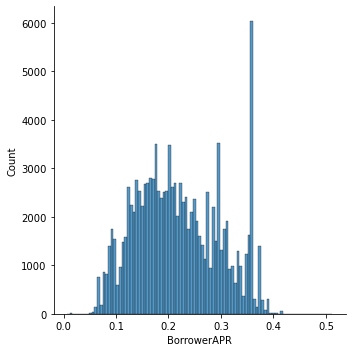

In [36]:
sb.displot(loanDF['BorrowerAPR']);

In [37]:
# What is going on with the interest rate around 0.36? Why are there so many loans with this percentage
borrAPR36 = loanDF.query('BorrowerAPR > 0.35 and BorrowerAPR < 0.37')
borrAPR36.shape

(8088, 81)

Some observations (not interesting):
1. The personal loan people had the lowest average credit score, students loans next
2. The RV loan types had the highest average credit score. This infers that people who have the ability to buy RVs are in better financial situations.

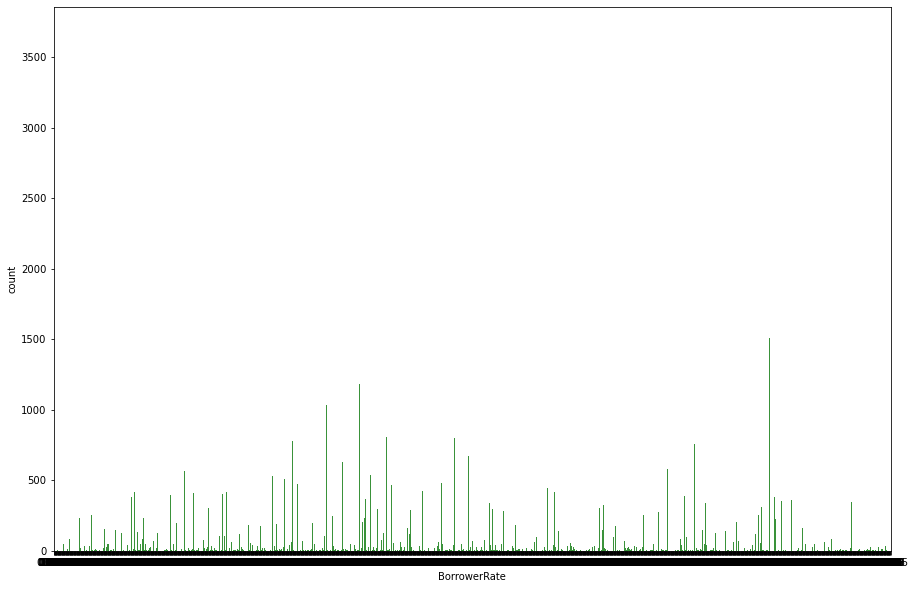

In [38]:
# Bin resizing, to transform the x-axis    
#bin_edges = np.arange(0, sqrt_trans(pokemon['weight'].max())+1, 1)
plt.figure(figsize = [15,10])
# Plot the scaled data
base_color = sb.color_palette()[2]
sb.countplot(data = loanDF, x = 'BorrowerRate', color = base_color);

# Identify the tick-locations
#tick_locs = np.arange(0, 21, 1)

# Apply x-ticks
#plt.xticks(tick_locs, [str(x) for x in np.arange(0,21,1)]);

### What is going on with the BorrowerAPR/Rate at 31-33% & 36-37%, well over 5000 records? Let's investigate additional info about these records

C:\Users\ozi\anaconda3\envs\Udacity\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


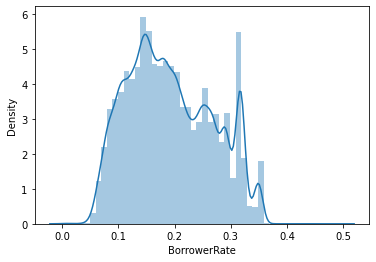

In [39]:
sb.distplot(loanDF['BorrowerRate']);

In [40]:
BorrRate30 = loanDF.query("BorrowerRate <= 0.33 and BorrowerRate >= 0.30")
BorrRate30.shape

(9512, 81)

C:\Users\ozi\anaconda3\envs\Udacity\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


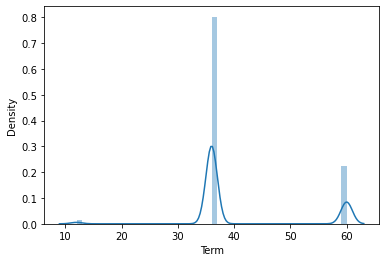

In [41]:
sb.distplot(loanDF['Term']);

Loan Terms = some 12 month, majority are 36 mnth loans, but healthy percentage at 60 mnth (5 year loan)

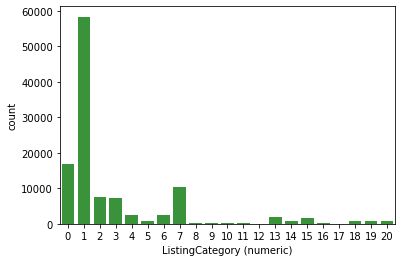

In [42]:
# Use Seaborn's CountPlot as an alternative to compare with plt.hist & seaborn's distplot

base_color = sb.color_palette()[2]
sb.countplot(data = loanDF, x = 'ListingCategory (numeric)', color = base_color);

The category of the listing that the borrower selected when posting their listing: <br/>
    0 - Not Available, <br/>
    1 - Debt Consolidation, <br/>
    2 - Home Improvement, <br/>
    3 - Business, <br/>
    4 - Personal Loan, <br/>
    5 - Student Use, <br/>
    6 - Auto, <br/>
    7- Other, <br/>
    8 - Baby&Adoption, <br/>
    9 - Boat, <br/>
    10 - Cosmetic Procedure, <br/>
    11 - Engagement Ring, <br/>
    12 - Green Loans, <br/>
    13 - Household Expenses, <br/>
    14 - Large Purchases, <br/>
    15 - Medical/Dental, <br/>
    16 - Motorcycle, <br/>
    17 - RV, <br/>
    18 - Taxes, <br/>
    19 - Vacation, <br/>
    20 - Wedding Loans <br/>


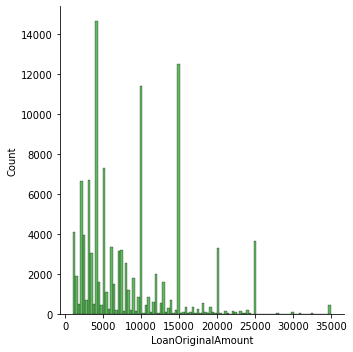

In [43]:
base_color = sb.color_palette()[2]
sb.displot(data = loanDF, x = 'LoanOriginalAmount', color = base_color);

1. Significant number of loans are multiples of 5000
2. Majority of loans are $15k and less 

In [44]:
help(sb.distplot)

Help on function distplot in module seaborn.distributions:

distplot(a=None, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None, x=None)
    DEPRECATED: Flexibly plot a univariate distribution of observations.
    
    .. warning::
       This function is deprecated and will be removed in a future version.
       Please adapt your code to use one of two new functions:
    
       - :func:`displot`, a figure-level function with a similar flexibility
         over the kind of plot to draw
       - :func:`histplot`, an axes-level function for plotting histograms,
         including with kernel density smoothing
    
    This function combines the matplotlib ``hist`` function (with automatic
    calculation of a good default bin size) with the seaborn :func:`kdeplot`
    and :func:`rugplot` functions. It can also fit ``scipy.stats``
    distributions and

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [45]:
borrAPR36.groupby('ListingCategory (numeric)')['LoanOriginalAmount'].mean()

ListingCategory (numeric)
0     3978.768115942029
1    4042.3369104772664
2     3844.583969465649
3     4743.340632603406
4    3147.6666666666665
5    3335.2727272727275
6    3564.3888888888887
7    3712.7869780608635
8                4000.0
9                4000.0
10   3505.8823529411766
11   3570.5882352941176
12   3234.1666666666665
13   3308.0933333333332
14    3535.123076923077
15    3306.068783068783
16   3502.7027027027025
17               4000.0
18   3576.2280701754385
19   3362.3513513513512
20               3668.0
Name: LoanOriginalAmount, dtype: float64

In [46]:
loanDF.groupby('ListingCategory (numeric)')['LoanOriginalAmount'].mean()

ListingCategory (numeric)
0     6253.853286177424
1      9908.35214721822
2     8092.084757163999
3     8926.859229378217
4     4556.670563674322
5     3514.568783068783
6     5000.647356143079
7     5911.547074518772
8     9751.396984924622
9     8734.117647058823
10    5683.516483516483
11    7636.944700460829
12     8456.57627118644
13    5285.486973947895
14     8771.90296803653
15    6524.268068331143
16    5560.809210526316
17   8148.7692307692305
18    7580.425988700565
19         5357.6953125
20    8835.726329442283
Name: LoanOriginalAmount, dtype: float64

In [47]:
borrAPR36.groupby('ListingCategory (numeric)')['CreditScoreRangeUpper'].mean()

ListingCategory (numeric)
0    585.6666666666666
1     693.029935046597
2    703.1475826972011
3    707.6374695863747
4    603.6153846153846
5    638.0909090909091
6     695.604938271605
7     697.273177636235
8    693.2857142857143
9                709.0
10   706.0588235294117
11   691.9411764705883
12   710.6666666666666
13   705.2933333333333
14   700.8461538461538
15   700.9047619047619
16   698.4594594594595
17               727.0
18   705.3157894736842
19   702.2432432432432
20   702.7333333333333
Name: CreditScoreRangeUpper, dtype: float64

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!